In [207]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns#

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score



# Importing train and test data sets, on which EDA was already performed.

In [208]:
train = pd.read_csv('../input/traindata/train.csv')
train.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,178942,307359,0,0,0,1,0,180000.0,746896.5,31774.5,...,0,0,0,0,0,1,0,0,1,0
1,17607,120529,0,0,0,1,0,63000.0,814500.0,23944.5,...,0,0,0,0,0,0,0,0,0,0
2,84845,198439,1,0,0,1,0,225000.0,450000.0,30573.0,...,0,0,0,0,0,0,0,0,0,0
3,176784,304860,0,0,0,1,0,157500.0,1256400.0,44644.5,...,0,0,0,0,0,1,0,0,1,0
4,2543,102965,0,0,0,0,0,90000.0,454500.0,14661.0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
train = train.drop(columns = "Unnamed: 0")
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,307359,0,0,0,1,0,180000.0,746896.5,31774.5,594000.0,...,0,0,0,0,0,1,0,0,1,0
1,120529,0,0,0,1,0,63000.0,814500.0,23944.5,814500.0,...,0,0,0,0,0,0,0,0,0,0
2,198439,1,0,0,1,0,225000.0,450000.0,30573.0,450000.0,...,0,0,0,0,0,0,0,0,0,0
3,304860,0,0,0,1,0,157500.0,1256400.0,44644.5,900000.0,...,0,0,0,0,0,1,0,0,1,0
4,102965,0,0,0,0,0,90000.0,454500.0,14661.0,454500.0,...,0,0,0,0,0,0,0,0,0,0


In [210]:
train.shape

(246008, 243)

In [211]:
test = pd.read_csv('../input/testdata/test.csv')
test.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,59809,169333,0,0,1,0,1,337500.0,625500.0,33930.0,...,0,0,0,0,0,1,0,0,1,0
1,205719,338455,0,0,0,0,0,157500.0,1078200.0,34780.5,...,0,0,0,0,0,0,1,0,1,0
2,77674,190055,0,0,0,1,0,67500.0,143910.0,16366.5,...,0,0,0,0,0,0,0,0,0,0
3,137000,258898,0,0,1,1,1,112500.0,622188.0,22477.5,...,0,0,0,0,0,0,1,0,1,0
4,215215,349380,0,1,0,1,1,169416.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,1,0


In [212]:
test = test.drop(columns = "Unnamed: 0")
test.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,169333,0,0,1,0,1,337500.0,625500.0,33930.0,625500.0,...,0,0,0,0,0,1,0,0,1,0
1,338455,0,0,0,0,0,157500.0,1078200.0,34780.5,900000.0,...,0,0,0,0,0,0,1,0,1,0
2,190055,0,0,0,1,0,67500.0,143910.0,16366.5,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,258898,0,0,1,1,1,112500.0,622188.0,22477.5,472500.0,...,0,0,0,0,0,0,1,0,1,0
4,349380,0,1,0,1,1,169416.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,1,0


In [213]:
test.shape

(61503, 243)

# Logistic regression

In [214]:
train_target = train["TARGET"]

In [215]:
train = train.drop(columns = "TARGET")

In [216]:
# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001, class_weight = "balanced")
# Train on the training data
log_reg.fit(train, train_target)

LogisticRegression(C=0.0001)

In [217]:
log_reg.predict_proba(train)

array([[0.9325856 , 0.0674144 ],
       [0.95366519, 0.04633481],
       [0.90150648, 0.09849352],
       ...,
       [0.8608914 , 0.1391086 ],
       [0.93315453, 0.06684547],
       [0.86275459, 0.13724541]])

In [218]:
test_target = test["TARGET"]
test = test.drop(columns="TARGET")

In [219]:
log_reg_probabilities = log_reg.predict_proba(test)[:, 1]

In [220]:
log_reg_probabilities

array([0.05021879, 0.04106062, 0.12037585, ..., 0.06798785, 0.05819039,
       0.08536576])

In [221]:
#print('Train/Test split results:')
#print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(Y_test, Y_pred))
print("ROC",  roc_auc_score(test_target, log_reg_probabilities))


ROC 0.6299052659669099


In [222]:
log_reg_predictions = log_reg.predict(test)

In [223]:
log_reg_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [228]:
f1 = f1_score(test_target, log_reg_predictions, "micro")
print('F1 score: %f' % f1)

F1 score: 0.000000


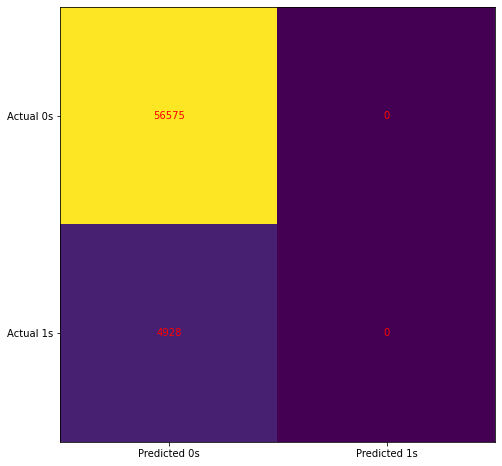

In [225]:
cm = confusion_matrix(test_target, log_reg_predictions)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [226]:
log_reg.score(test, test_target)

0.9198738272929776